# Implemeting qft

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.tools.visualization import circuit_drawer, plot_histogram
from qiskit import execute
from math import pi
import matplotlib.pyplot as plt

In [2]:
# Create a Quantum Register with 6 qubits
qr = QuantumRegister(6)

# Create a Classical Register with 6 bits
cr = ClassicalRegister(6)

# Create a Quantum Circuit acting on the qr and cr register
circuit = QuantumCircuit(qr, cr)

"""
circuit.h(qr[0])
circuit.cu1(pi/float(2**(0-1)),qr[0], qr[1])
circuit.cu1(pi/float(2**(0-2)),qr[0], qr[2])
circuit.cu1(pi/float(2**(0-3)),qr[0], qr[3])
circuit.cu1(pi/float(2**(0-4)),qr[0], qr[4])
circuit.cu1(pi/float(2**(0-5)),qr[0], qr[5])

circuit.h(qr[1])
circuit.cu1(pi/float(2**(1-2)),qr[1], qr[2])
circuit.cu1(pi/float(2**(1-3)),qr[1], qr[3])
circuit.cu1(pi/float(2**(1-4)),qr[1], qr[4])
circuit.cu1(pi/float(2**(1-5)),qr[1], qr[5])

circuit.h(qr[2])
circuit.cu1(pi/float(2**(2-3)),qr[2], qr[3])
circuit.cu1(pi/float(2**(2-4)),qr[2], qr[4])
circuit.cu1(pi/float(2**(2-5)),qr[2], qr[5])

circuit.h(qr[3])
circuit.cu1(pi/float(2**(3-4)),qr[3], qr[4])
circuit.cu1(pi/float(2**(3-5)),qr[3], qr[5])

circuit.h(qr[4])
circuit.cu1(pi/float(2**(4-5)),qr[4], qr[5])

circuit.h(qr[5])
"""

for i in range(len(qr)):
    for j in range(i):
        circuit.cu1(pi/float(2**(i-j)),qr[i], qr[j])
    circuit.h(qr[i])


# measure gate from qr to cr
circuit.measure(qr, cr)

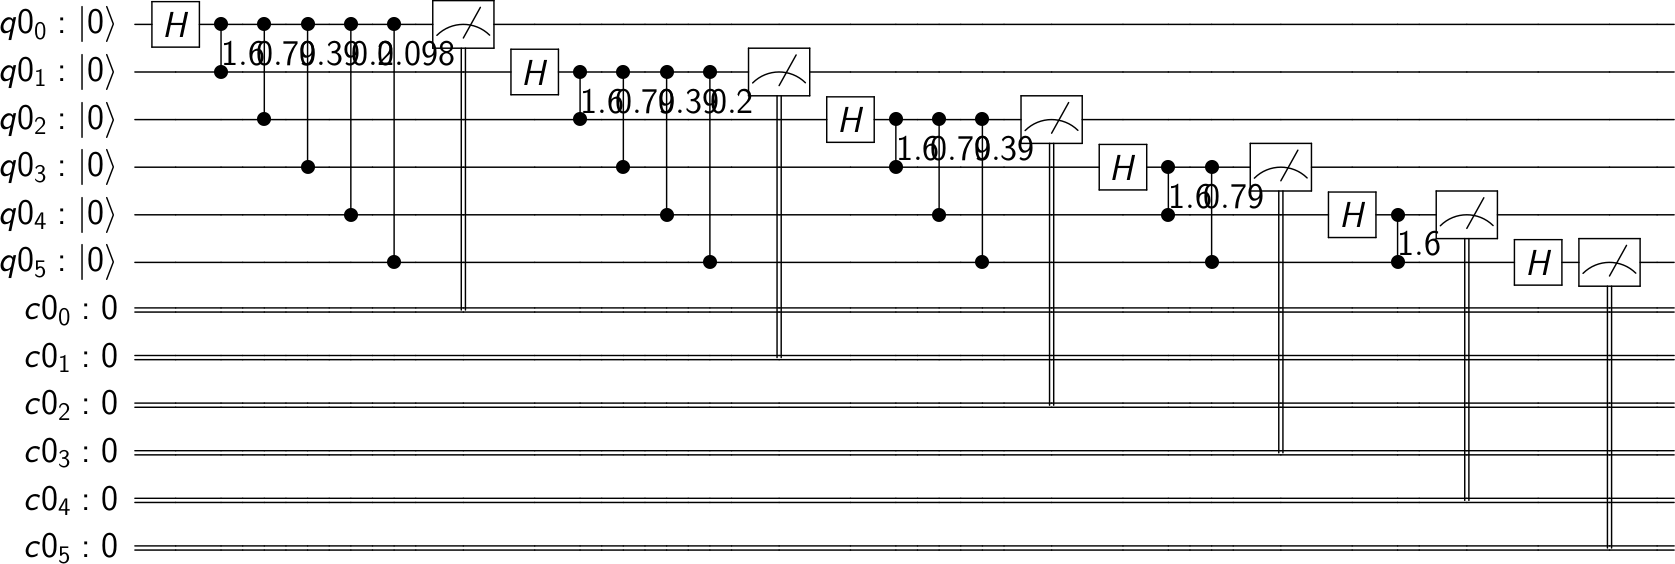

In [3]:
circuit_drawer(circuit)

In [4]:
from qiskit import Aer
backend = Aer.get_backend('qasm_simulator')

In [5]:
# Create a Quantum Program for execution 
number_of_trials = 30000
job = execute(circuit, backend, shots=number_of_trials)

In [6]:
job.status()

<JobStatus.RUNNING: 'job is actively running'>

In [7]:
result = job.result()

In [8]:
counts = result.get_counts(circuit)

In [9]:
counts

{'000000': 461,
 '000001': 506,
 '000010': 479,
 '000011': 452,
 '000100': 454,
 '000101': 487,
 '000110': 439,
 '000111': 447,
 '001000': 445,
 '001001': 505,
 '001010': 473,
 '001011': 429,
 '001100': 438,
 '001101': 496,
 '001110': 444,
 '001111': 470,
 '010000': 431,
 '010001': 489,
 '010010': 444,
 '010011': 462,
 '010100': 464,
 '010101': 473,
 '010110': 494,
 '010111': 450,
 '011000': 498,
 '011001': 464,
 '011010': 461,
 '011011': 457,
 '011100': 507,
 '011101': 478,
 '011110': 481,
 '011111': 445,
 '100000': 469,
 '100001': 465,
 '100010': 471,
 '100011': 468,
 '100100': 452,
 '100101': 459,
 '100110': 457,
 '100111': 480,
 '101000': 457,
 '101001': 463,
 '101010': 488,
 '101011': 489,
 '101100': 485,
 '101101': 473,
 '101110': 474,
 '101111': 488,
 '110000': 475,
 '110001': 460,
 '110010': 459,
 '110011': 511,
 '110100': 438,
 '110101': 478,
 '110110': 456,
 '110111': 447,
 '111000': 486,
 '111001': 504,
 '111010': 486,
 '111011': 465,
 '111100': 462,
 '111101': 469,
 '111110

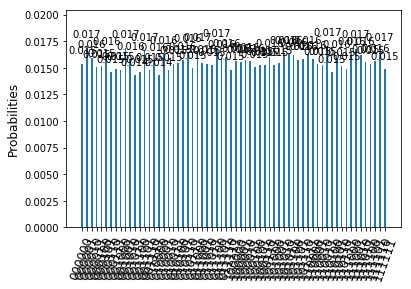

In [10]:
plot_histogram(counts)

## Try different initialisations

In [11]:
N = 6

In [12]:
def create_register_and_qft(which_to_not: int = 0):
    qr = QuantumRegister(N)
    cr = ClassicalRegister(N)
    circuit = QuantumCircuit(qr, cr)

    for pos,sign in enumerate("{0:b}".format(which_to_not).zfill(N)):
        if sign == '1':
            circuit.x(qr[pos])
            
    for i in range(len(qr)):
        for j in range(i):
            circuit.cu1(pi/float(2**(i-j)),qr[i], qr[j])
        circuit.h(qr[i])
    

    # measure gate from qr to cr
    circuit.measure(qr, cr)
    
    number_of_trials = 10000
    job = execute(circuit, backend, shots=number_of_trials)

    result = job.result()
    counts = result.get_counts(circuit)
    
    return counts

[]

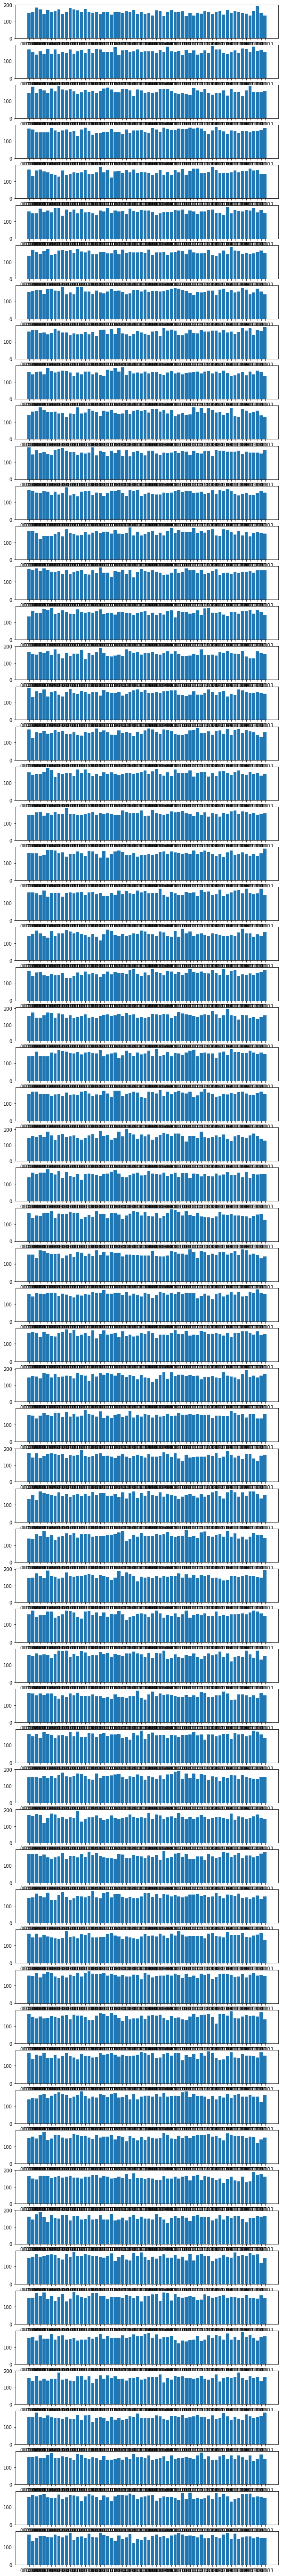

In [23]:
fig, ax = plt.subplots(64, 1, figsize=(10,100))
ax_flat = ax.flat
for index, current_ax in enumerate(ax_flat):
    counts = create_register_and_qft(index)
    current_ax.bar(*list(zip(*counts.items())))
plt.plot()